## Assignment 1: Age of Discovery

a) Find the number of planets discovered each year, and plot the number of planets discovered vs year.  
_(Hint: This can be done manually as in Exercise 2, or using a histogram tool such as np.hist() or plt.hist()  
If using one of these tools, be careful about the definition of the bins!)_


b) Find the smallest and largest planet mass (if known), and plot these as two curves against the year of discovery.   
_(Hints: the mass will be 0 if unknown;  
look at the jan 1987 example in the numpy_files notebook if you get stuck...;  
  use .semilogy instead of .plot to make the y-axis scale logarithmic in your plot)_


In [1]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt




In [2]:
data = np.loadtxt('planets_2020.csv', delimiter=',', dtype=str  )
data[np.where(data=='')] = '0'
#loads data source file
#makes sure zero values aren't a problem

In [3]:
labels = data[0]
print(labels)
#denotes data values recorded in file by labelname

['hostname' 'pl_name' 'sy_pnum' 'disc_year' 'pl_orbper' 'pl_orbsmax'
 'pl_bmassj' 'st_teff' 'st_rad' 'st_mass' 'sy_dist']


In [4]:
disc_year = data[1:, 3].astype(int)
unique_disc_year=np.unique(disc_year)
#finds each unique value for year that could occur
disc_list=[]
for disc in unique_disc_year:
    disc_list.append(np.count_nonzero(disc_year==disc))
#print(disc_list)
#print(unique_disc_year)
#for each planet discovered in the data table, a certain year is associated with it.
#if multiple planets have the same year, multiple planets were discovered in said year
#can find counts of each year to find planets discovered. Print these if verification is required

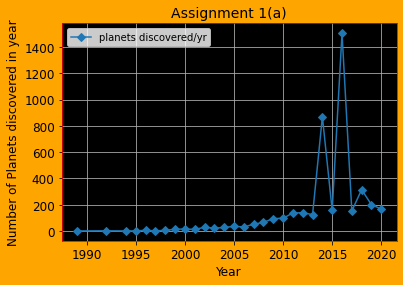

<Figure size 432x288 with 0 Axes>

In [5]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(unique_disc_year, disc_list, '-D',label='planets discovered/yr' )
#creates a plot of year vs number of planets discovered
ax.set_ylabel('Number of Planets discovered in year', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.tick_params(axis="both", labelsize=12)
ax.set_facecolor('black')
#changes face_colour to black, against which features stand out more
ax.spines['bottom'].set_color('red')
ax.spines['top'].set_color('red')
ax.spines['left'].set_color('red')
ax.spines['right'].set_color('red')
plt.gcf().set_facecolor('orange')
plt.legend(loc="upper left")
#adds more aesthetic presentation of colours to the graph
plt.grid()
#grid added to make values clearer
plt.title('Assignment 1(a)',fontsize=14)
#hw title
plt.show()
plt.savefig('planets_discovered_per_year.svg')
#saves the image

In [39]:
pl_bmassj=data[1:,6].astype(float)
#define mass variable
pla=zip(disc_year,pl_bmassj)
pla_list=np.array(list(pla))
#zips the year vs mass in tuples then makes it an array for ease of use
mass_max=[list(pla_list[pla_list[:,0]==c].max(0))for c in set(pla_list[:,0])]
mass_min=[list(pla_list[pla_list[:,0]==c].min(0))for c in set(pla_list[:,0])]
#finds max and min mass for each unique year value in list,i.e year is the first value given index[0]
x1=[]
x2=[]
y1=[]
y2=[]
#empty lists
for something in mass_max:
    x1.append(something[0])
for something in mass_max:
    y1.append(something[1])
for something in mass_min:
    x2.append(something[0])
for something in mass_min:
    y2.append(something[1])
#appending each x and y value to lists so they can be plotted easier

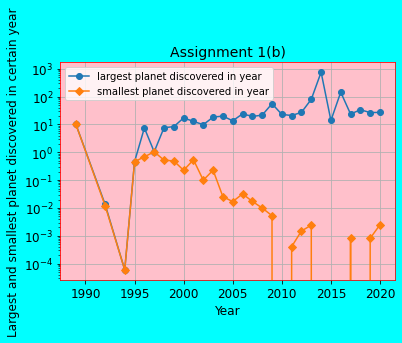

<Figure size 432x288 with 0 Axes>

In [41]:
fig = plt.figure(2)
ax = fig.add_subplot(111)
ax.semilogy(x1, y1, 'o-',label='largest planet discovered in year' )
ax.semilogy(x2,y2,'D-',label='smallest planet discovered in year')
#creates a plot of year vs max and min planet size in each year 
#using a semilog axis provides better clarity in seeing how values are related
#note that in years where only one value was discovered, this acts both as max and min for that year
ax.set_ylabel('Largest and smallest planet discovered in certain year', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
#adds generic x and y labe;s
ax.tick_params(axis="both", labelsize=12)
ax.set_facecolor('pink')
ax.spines['bottom'].set_color('red')
ax.spines['top'].set_color('red')
ax.spines['left'].set_color('red')
ax.spines['right'].set_color('red')
plt.gcf().set_facecolor('cyan')
plt.legend(loc="best")
#adds more aesthetic presentation of colours to the graph
plt.grid()
#grid added to make values clearer
plt.title('Assignment 1(b)',fontsize=14)
#hw title
plt.show()
#displays figure
plt.savefig('planets_size_per_year.svg')
#saves image